In [1]:
data_seq = '1'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
import joblib
import os



### 1. Base Model - Logistic Regression


Model Accuracy: 22.22%


/Users/kalyanroy/anaconda3/envs/aienv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


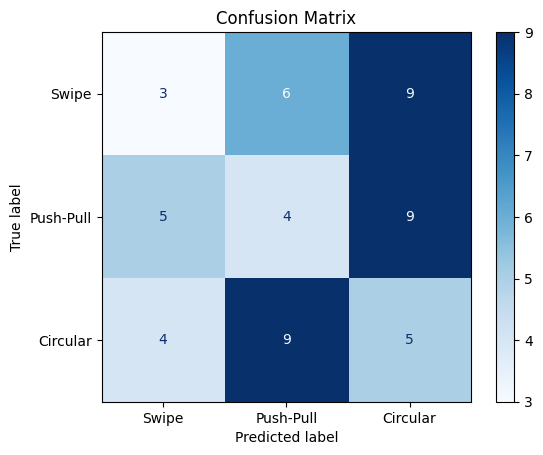

Classification Report:
              precision    recall  f1-score   support

       Swipe       0.25      0.17      0.20        18
   Push-Pull       0.21      0.22      0.22        18
    Circular       0.22      0.28      0.24        18

    accuracy                           0.22        54
   macro avg       0.23      0.22      0.22        54
weighted avg       0.23      0.22      0.22        54



In [3]:


# Step 1: Load the preprocessed data
data_path = '../data/processed/'+data_seq+'/gesture_data.npz'
data = np.load(data_path)

# Extract data and labels
sequences = data['data']
labels = data['labels']

# Step 2: Flatten each sequence for Logistic Regression
# Logistic Regression requires 2D input, so we reshape each sequence (e.g., 1xN) to a 1D array
X = sequences.reshape(sequences.shape[0], -1)  # Flatten each sequence
y = labels

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Step 4: Initialize and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Step 5: Make predictions on the test set
y_pred = lr_model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

# Step 7: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Swipe', 'Push-Pull', 'Circular'])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# Step 8: Classification Report
report = classification_report(y_test, y_pred, target_names=['Swipe', 'Push-Pull', 'Circular'])
print("Classification Report:")
print(report)

 ### 1.5 Define a Function - Train & Evaluate 

In [4]:
# Function to train, evaluate, and display results
def train_and_evaluate_model(model, model_name):
    """
    Trains and evaluates a given model, printing accuracy, classification report, 
    and displaying a confusion matrix.
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Print accuracy
    print(f"\n{model_name} Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
    
    # Print classification report
    print(f"\n{model_name} Classification Report:\n")
    print(classification_report(y_test, y_pred, target_names=['Swipe', 'Push-Pull', 'Circular']))
    
    # Display confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Swipe', 'Push-Pull', 'Circular'])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

### 2. Random Forest


Random Forest Accuracy: 50.00%

Random Forest Classification Report:

              precision    recall  f1-score   support

       Swipe       0.81      0.72      0.76        18
   Push-Pull       0.35      0.39      0.37        18
    Circular       0.39      0.39      0.39        18

    accuracy                           0.50        54
   macro avg       0.52      0.50      0.51        54
weighted avg       0.52      0.50      0.51        54



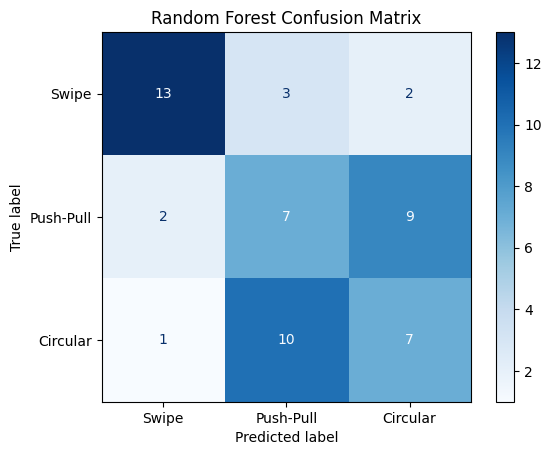

In [5]:


# 1. Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
train_and_evaluate_model(random_forest_model, "Random Forest")



### 3. Support Vector Machine (SVM)



Support Vector Machine Accuracy: 42.59%

Support Vector Machine Classification Report:

              precision    recall  f1-score   support

       Swipe       0.65      0.72      0.68        18
   Push-Pull       0.22      0.22      0.22        18
    Circular       0.38      0.33      0.35        18

    accuracy                           0.43        54
   macro avg       0.42      0.43      0.42        54
weighted avg       0.42      0.43      0.42        54



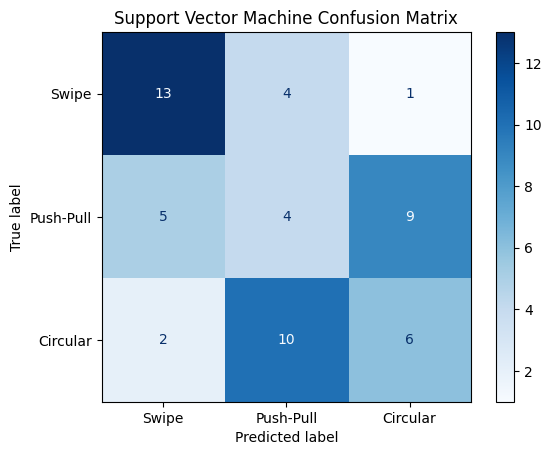

In [6]:

#  Support Vector Machine (SVM)
svm_model = SVC(kernel='rbf', C=1.0, random_state=42)  # Use RBF kernel for non-linear decision boundaries
train_and_evaluate_model(svm_model, "Support Vector Machine")

### 4. GBDT with XGBoost


Gradient Boosted Decision Trees (XGBoost) Accuracy: 42.59%

Gradient Boosted Decision Trees (XGBoost) Classification Report:

              precision    recall  f1-score   support

       Swipe       0.80      0.67      0.73        18
   Push-Pull       0.26      0.33      0.29        18
    Circular       0.31      0.28      0.29        18

    accuracy                           0.43        54
   macro avg       0.46      0.43      0.44        54
weighted avg       0.46      0.43      0.44        54



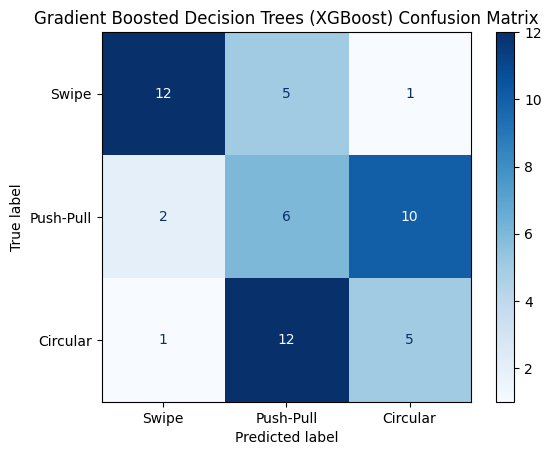

In [7]:

# Initialize XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=3, 
    random_state=42
)

# Train and evaluate
train_and_evaluate_model(xgb_model, "Gradient Boosted Decision Trees (XGBoost)")

### 5. Stacking(ensemble)


Stacking Ensemble Accuracy: 57.41%

Stacking Ensemble Classification Report:

              precision    recall  f1-score   support

       Swipe       0.81      0.72      0.76        18
   Push-Pull       0.48      0.61      0.54        18
    Circular       0.47      0.39      0.42        18

    accuracy                           0.57        54
   macro avg       0.59      0.57      0.58        54
weighted avg       0.59      0.57      0.58        54



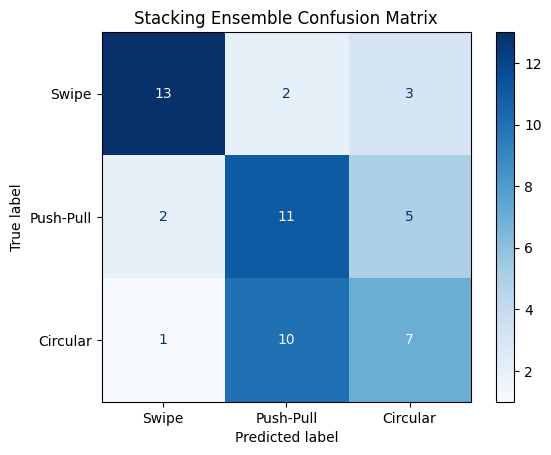

In [8]:


# Define base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svm', SVC(kernel='rbf', C=1.0, probability=True, random_state=42)),
    ('xgb', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
]

# Define meta-model (Logistic Regression)
stacking_model = StackingClassifier(
    estimators=base_models, 
    final_estimator=LogisticRegression()
)

# Train and evaluate
train_and_evaluate_model(stacking_model, "Stacking Ensemble")


### Comparison and Visualization

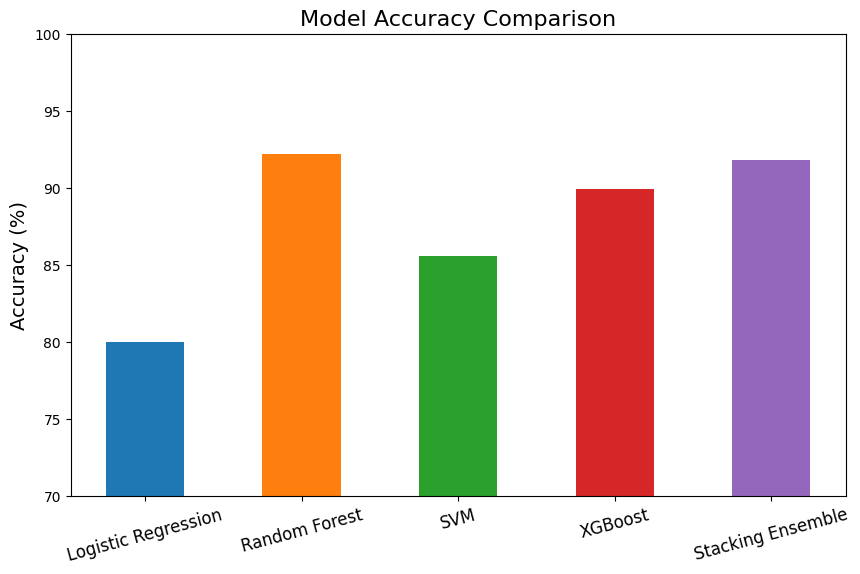

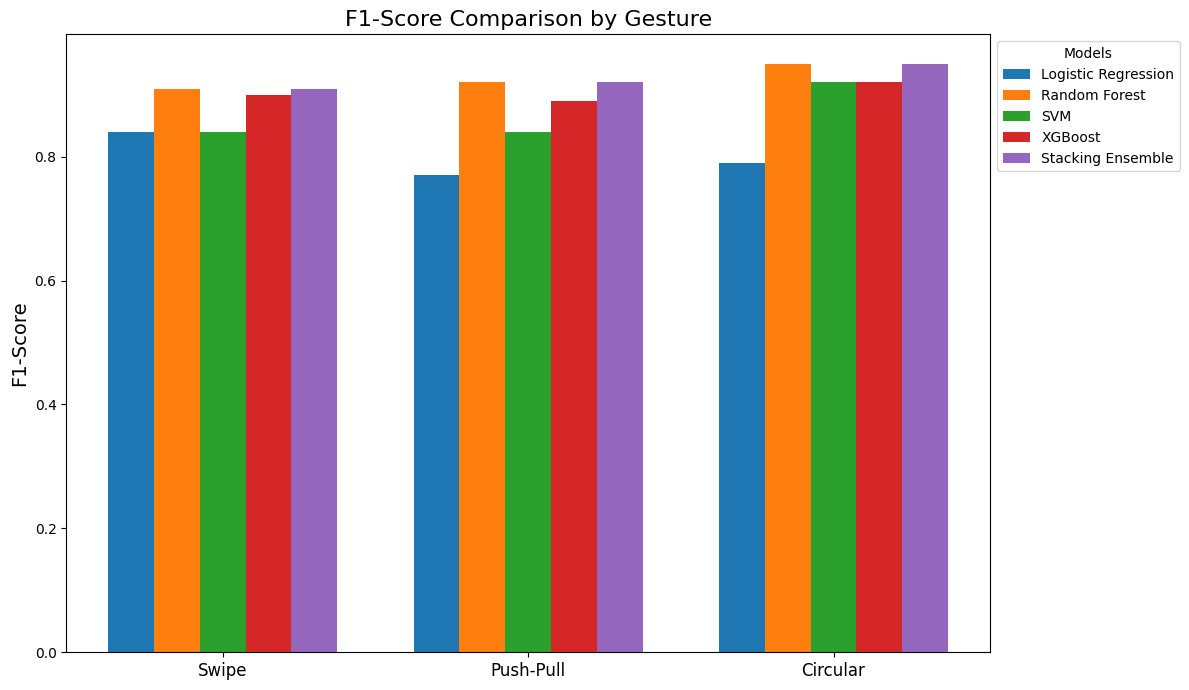

In [18]:


# Accuracy data
models = ['Logistic Regression', 'Random Forest', 'SVM', 'XGBoost', 'Stacking Ensemble']
accuracies = [80.0, 92.17, 85.58, 89.91, 91.82]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']  # Distinct colors for each model

# F1-Score data
gestures = ['Swipe', 'Push-Pull', 'Circular']
f1_scores = {
    'Logistic Regression': [0.84, 0.77, 0.79],
    'Random Forest': [0.91, 0.92, 0.95],
    'SVM': [0.84, 0.84, 0.92],
    'XGBoost': [0.90, 0.89, 0.92],
    'Stacking Ensemble': [0.91, 0.92, 0.95]
}

# Plot 1: Accuracy Comparison
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=colors, width=0.5)  # Reduced bar width
plt.title('Model Accuracy Comparison', fontsize=16)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.xticks(rotation=15, fontsize=12)
plt.ylim(70, 100)
plt.show()

# Plot 2: F1-Score Comparison
x = np.arange(len(gestures))  # Gesture positions
width = 0.15  # Adjusted bar width for better spacing

plt.figure(figsize=(12, 7))
for i, (model, scores) in enumerate(f1_scores.items()):
    plt.bar(x + i * width, scores, width, label=model)

plt.title('F1-Score Comparison by Gesture', fontsize=16)
plt.ylabel('F1-Score', fontsize=14)
plt.xticks(x + (len(f1_scores) - 1) * width / 2, gestures, fontsize=12)  # Center x-axis labels
plt.legend(title='Models', fontsize=10, loc='upper left', bbox_to_anchor=(1, 1))  # Place legend outside plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


### Save the trained models

In [9]:


# Define the path to the models directory
models_dir = '../models/'+data_seq+'/'

# Ensure the directory exists
os.makedirs(models_dir, exist_ok=True)

# Save models with paths
joblib.dump(lr_model, os.path.join(models_dir, 'logistic_model.pkl'))
joblib.dump(random_forest_model, os.path.join(models_dir, 'random_forest_model.pkl'))
joblib.dump(svm_model, os.path.join(models_dir, 'svm_model.pkl'))
joblib.dump(xgb_model, os.path.join(models_dir, 'xgboost_model.pkl'))
joblib.dump(stacking_model, os.path.join(models_dir, 'stacking_model.pkl'))


['../models/1/stacking_model.pkl']